In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,classification_report,confusion_matrix

In [5]:
df = pd.read_csv('titanic.csv')
X = df[['Pclass','Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
y = df['Survived']
X = pd.get_dummies(X,columns=['Sex'], drop_first=True)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

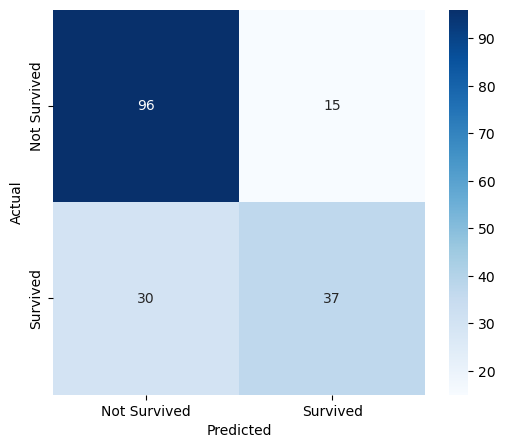

In [8]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived','Survived'],yticklabels=['Not Survived','Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

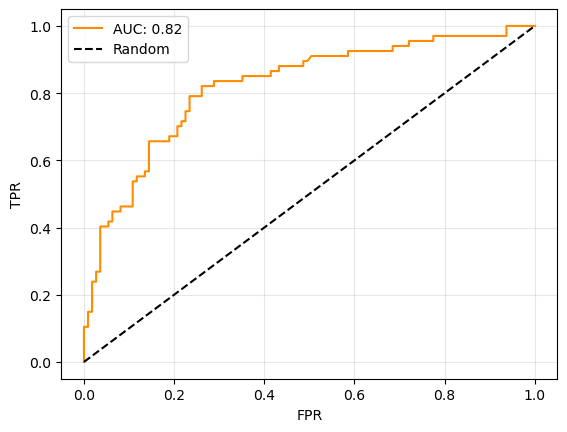

In [13]:
fpr,tpr,_ = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,color='darkorange', label=f"AUC: {roc_auc_score(y_test,y_prob):.2f}")
plt.plot([0,1],[0,1],'k--', label='Random')
plt.grid(alpha=0.3)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [14]:
print(f"{accuracy_score(y_test,y_pred)}")
print(f"{classification_report(y_test,y_pred)}")
print(f"{roc_auc_score(y_test,y_pred)}")

0.7471910112359551
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       111
           1       0.71      0.55      0.62        67

    accuracy                           0.75       178
   macro avg       0.74      0.71      0.72       178
weighted avg       0.74      0.75      0.74       178

0.7085518354175071
